In [7]:
import pandas as pd
from PIL import Image

In [8]:
df_train = pd.read_csv('./Data/df_train.csv')
df_val = pd.read_csv('./Data/df_val.csv')

In [9]:
df_val

Index  \
0      munster_000025_000019   
1      munster_000156_000019   
2      munster_000050_000019   
3      munster_000123_000019   
4      munster_000091_000019   
..                       ...   
495  frankfurt_000001_037705   
496  frankfurt_000000_014480   
497  frankfurt_000001_051807   
498  frankfurt_000001_066574   
499  frankfurt_000000_000294   

                                            Image_Path  \
0    ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
1    ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
2    ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
3    ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
4    ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
..                                                 ...   
495  ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
496  ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
497  ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
498  ./Data/files/Cityscapes_leftImg8bit_trainvalte...   
499  ./Data/files/Cityscapes_leftImg8bit_trainvalte...   

                                           Target_Path  
0    ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
1    ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
2    ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
3    ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
4    ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
..                                                 ...  
495  ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
496  ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
497  ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
498  ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  
499  ./Data/files/Cityscapes_gtFine_trainvaltest/gt...  

[500 rows x 3 columns]

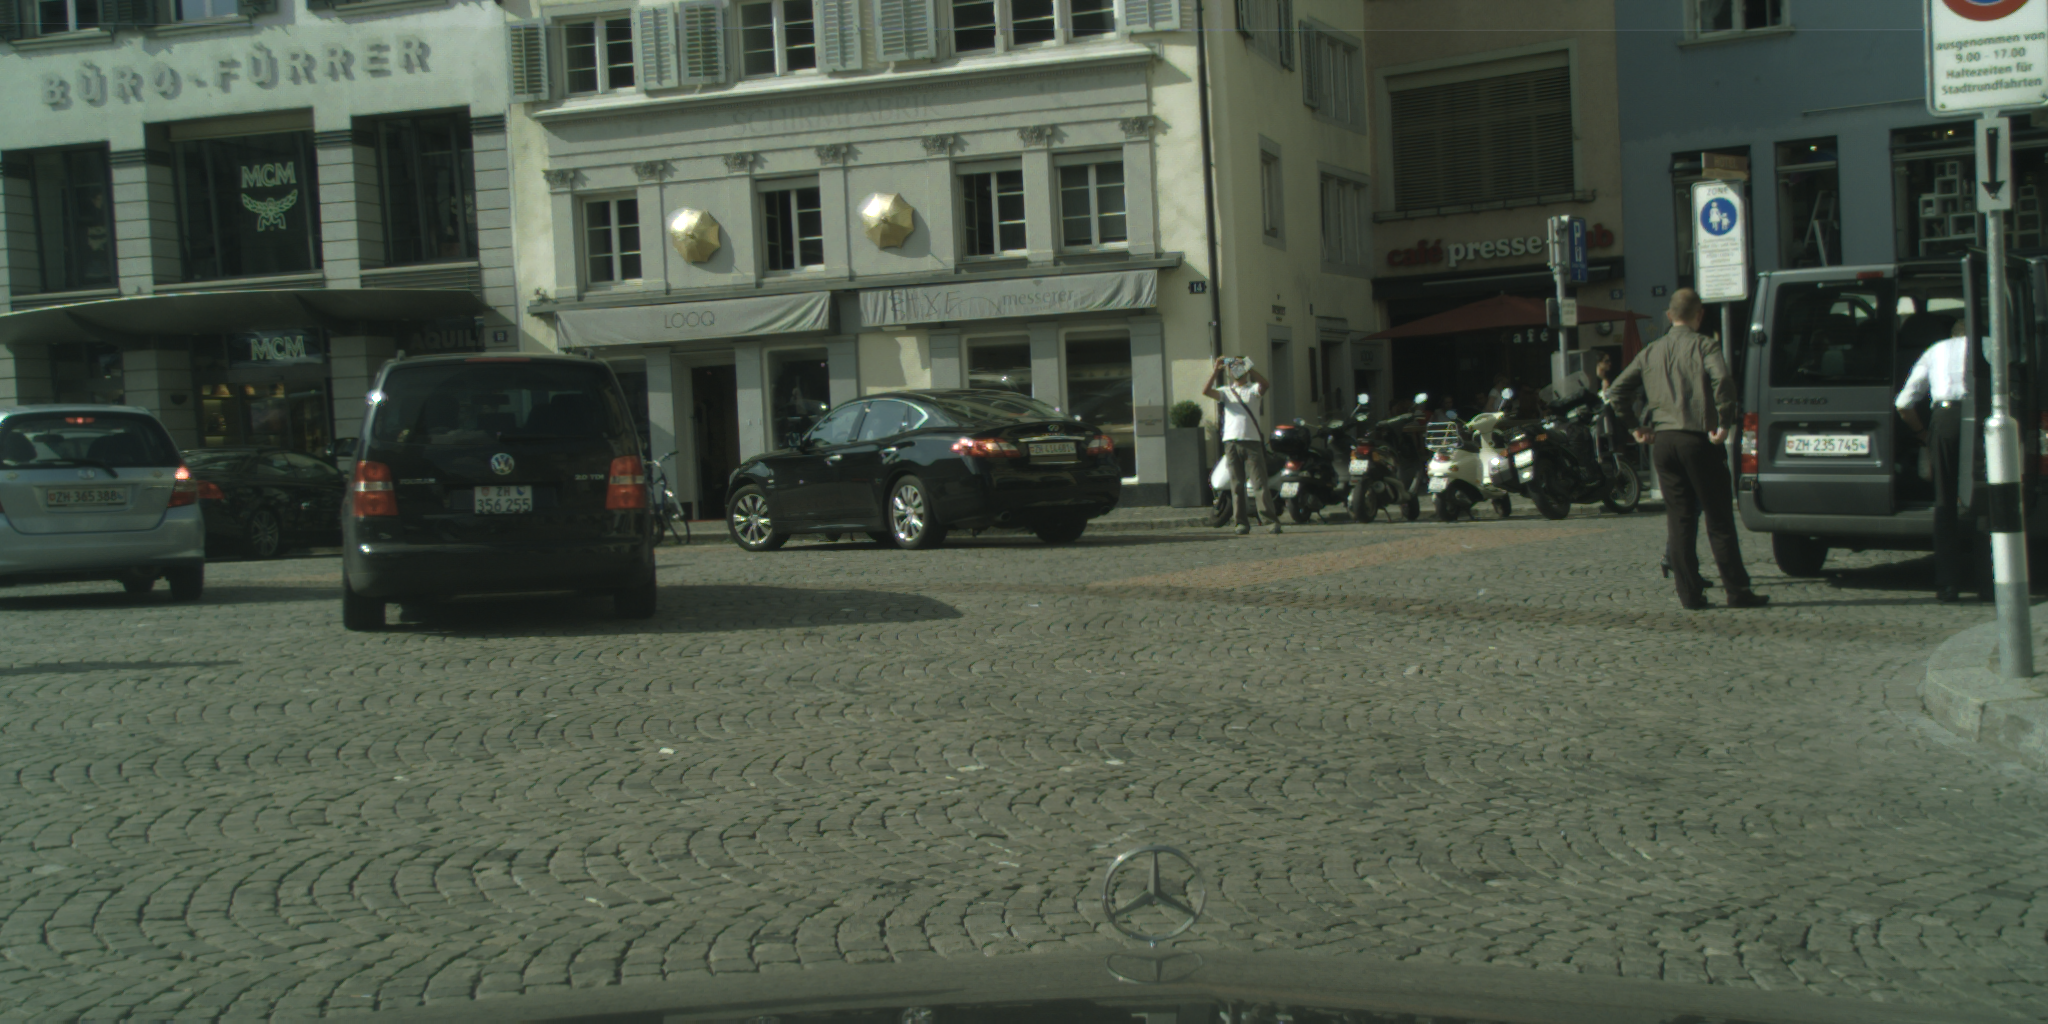

In [10]:
img_path = Image.open(df_train['Image_Path'].iloc[0])
img_path

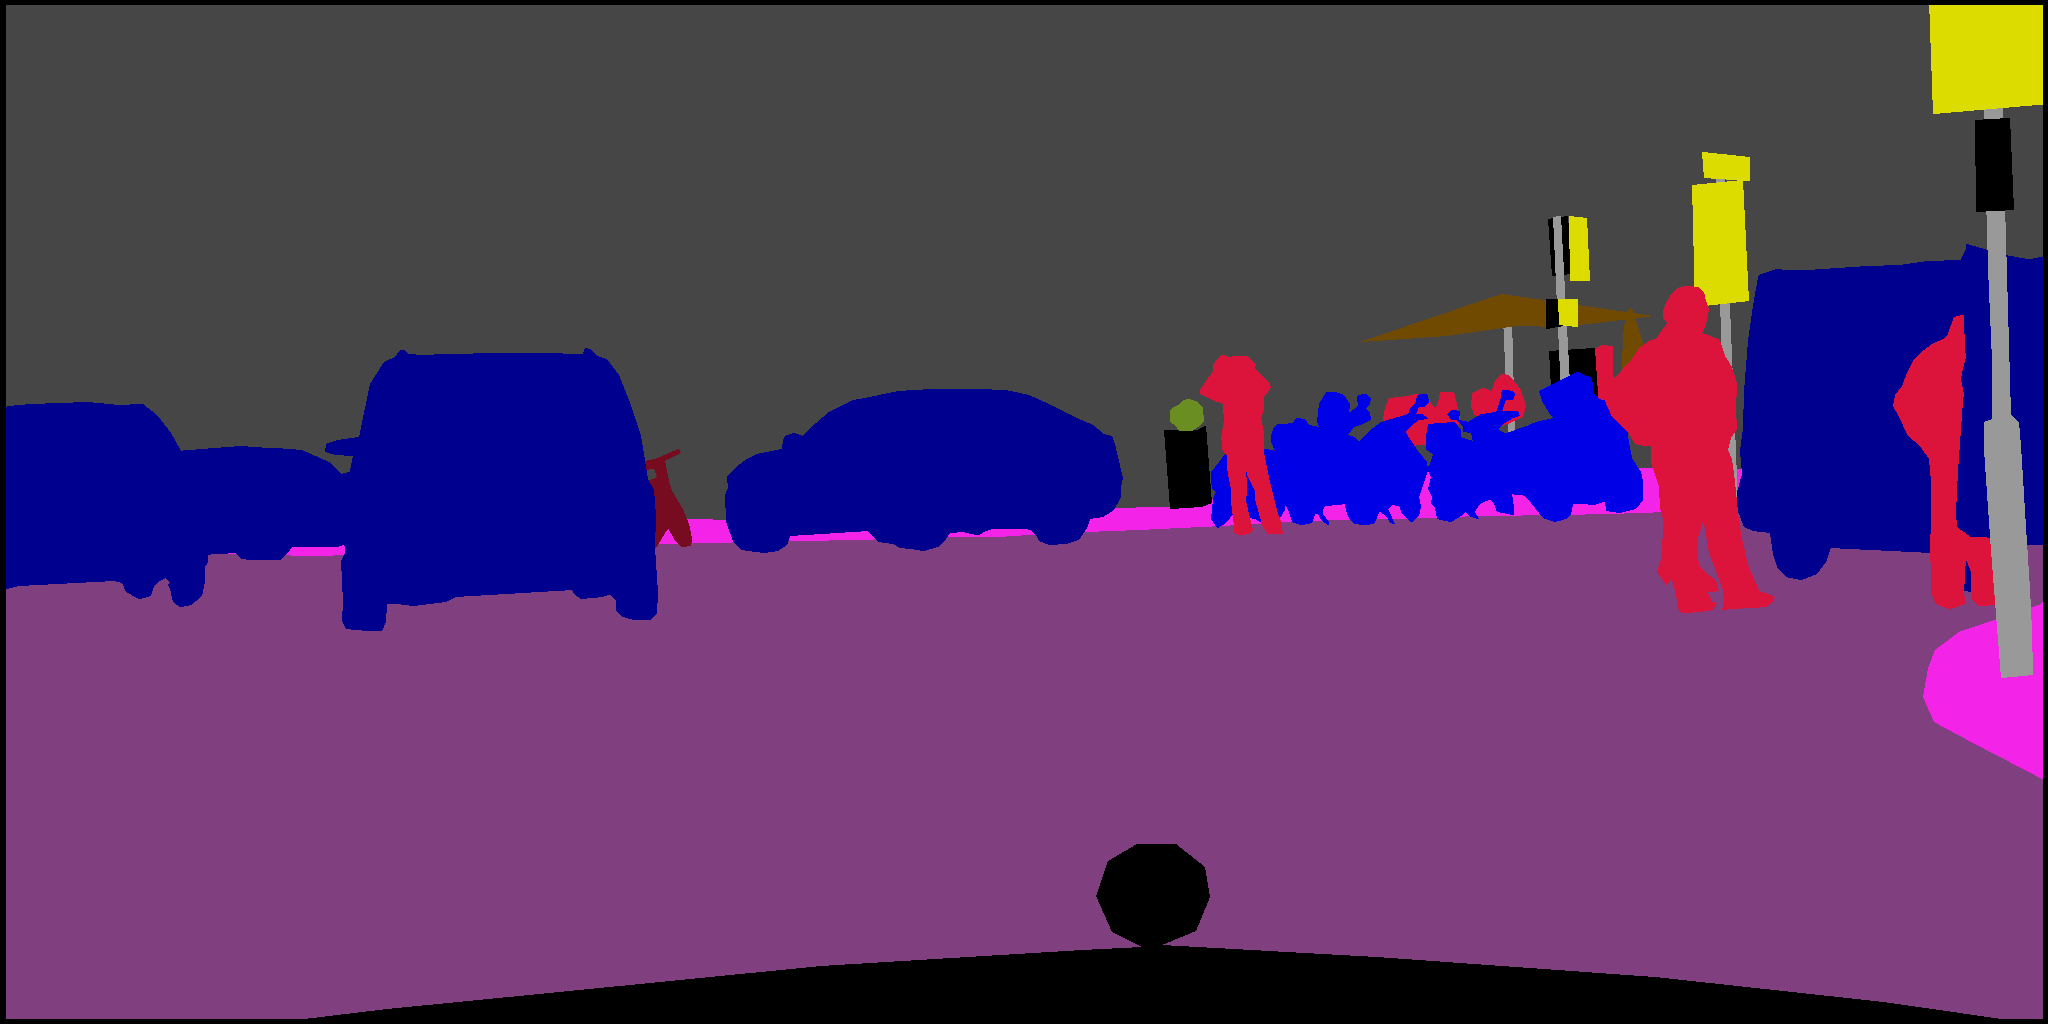

In [11]:
img_target = Image.open(df_train['Target_Path'].iloc[0])
img_target

In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

2024-03-13 16:01:03.410572: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
path_images_train = df_train['Image_Path'].values
path_label_train = df_train['Target_Path'].values

path_images_val = df_val['Image_Path'].values
path_label_val = df_val['Target_Path'].values

In [14]:
X_train = [img_to_array(load_img(path, target_size=(224, 224))) for path in path_images_train]
y_train = [img_to_array(load_img(chemin, target_size=(224, 224))) for chemin in path_label_train]

X_val = [img_to_array(load_img(path, target_size=(224, 224))) for path in path_images_val]
y_val = [img_to_array(load_img(chemin, target_size=(224, 224))) for chemin in path_label_val]

In [15]:
X_train = np.array(X_train)
X_train = X_train / 255.0

y_train = np.array(y_train)
y_train = y_train / 255.0

X_val = np.array(X_val)
X_val = X_val / 255.0

y_val = np.array(y_val)
y_val = y_val / 255.0

In [16]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [17]:
# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

In [33]:
# Construction du modèle complet avec des couches de transposition de convolution pour agrandir la sortie
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2DTranspose(1, (3, 3), strides=(2, 2), activation='sigmoid', padding='same')
])

In [34]:
# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy')

In [35]:
model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/3


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 224, 224, 3), output.shape=(None, 224, 224, 1)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Chargement des données
data = pd.read_csv('chemin_vers_votre_dataframe.csv')

# Chemins des images
chemin_images = data['chemin_image'].values
chemin_annotations = data['chemin_annotation'].values

# Charger les images et les annotations
images = [img_to_array(load_img(chemin, target_size=(224, 224))) for chemin in chemin_images]
annotations = [img_to_array(load_img(chemin, target_size=(224, 224))) for chemin in chemin_annotations]

# Conversion en arrays numpy
images = np.array(images)
annotations = np.array(annotations)

# Normalisation des images
images = images / 255.0
annotations = annotations / 255.0

# Diviser les données en ensembles d'entraînement et de validation
X_train, X_val, y_train, y_val = train_test_split(images, annotations, test_size=0.2, random_state=42)

# Chargement du modèle VGG16 pré-entraîné
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Geler les couches du modèle de base
for layer in base_model.layers:
    layer.trainable = False

# Construction du modèle complet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')
])

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Utiliser le modèle entraîné sur de nouvelles données (par exemple, X_test)
# predictions = model.predict(X_test)
